In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model

In [2]:
inputs = Input(shape=(1, 2))
output, state = SimpleRNN(3, return_state=True)(inputs)
model = Model(inputs = inputs, outputs = [output, state])

In [3]:
data = np.array([[[1, 2]]])
output, state = model.predict(data)
print(output)
print(state)

1/1 [==============================] - 0s 152ms/step
[[ 0.9853613  0.8701163 -0.9530327]]
[[ 0.9853613  0.8701163 -0.9530327]]


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 2)]            0         
                                                                 
 simple_rnn (SimpleRNN)      [(None, 3),               18        
                              (None, 3)]                         
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.layers[1].weights[0]

<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.72459435,  0.65325534, -0.32782674],
       [ 0.8651736 ,  0.34015155, -0.76800835]], dtype=float32)>

In [6]:
model.layers[1].get_weights()

[array([[ 0.72459435,  0.65325534, -0.32782674],
        [ 0.8651736 ,  0.34015155, -0.76800835]], dtype=float32),
 array([[ 0.6717317 , -0.713003  ,  0.20100561],
        [ 0.26140937,  0.48202866,  0.83624965],
        [ 0.69313896,  0.5091907 , -0.51017964]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [7]:
# I work at google [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
# I google at work [[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]

data = np.array([
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]],
    [[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]
])

In [8]:
inputs = Input(shape=(4, 4))
output, state = SimpleRNN(3, return_state=True, return_sequences=True)(inputs)
model = Model(inputs = inputs, outputs = [output, state])
output, state = model.predict(data)
print('I work at google: ', output[0])
print('I google at work: ', output[1])

1/1 [==============================] - 0s 140ms/step
I work at google:  [[-0.68322057 -0.53173786  0.47282872]
 [-0.87214184 -0.48548856  0.05102868]
 [-0.09793351  0.22461504 -0.5067506 ]
 [ 0.34798974 -0.78681237 -0.55838424]]
I google at work:  [[-0.68322057 -0.53173786  0.47282872]
 [-0.74564475 -0.7275685  -0.73527616]
 [ 0.19913301 -0.04824157  0.16552521]
 [-0.4050199  -0.02554221  0.1895077 ]]


In [9]:
print('I work at google: ', state[0])
print('I google at work: ', state[1])

I work at google:  [ 0.34798974 -0.78681237 -0.55838424]
I google at work:  [-0.4050199  -0.02554221  0.1895077 ]


In [10]:
from tensorflow.keras.layers import LSTM

In [11]:
inputs = Input(shape= (1, 2))
lstm_out, hidden_state, cell_state = LSTM(1, return_state=True)(inputs)
model = Model(inputs = inputs, outputs = [lstm_out, hidden_state, cell_state])
data = np.array([
    [[1, 0]]
])
lstm_out, hidden_state, cell_state = model.predict(data)
print(lstm_out)
print(hidden_state)
print(cell_state)

1/1 [==============================] - 0s 372ms/step
[[-0.12898088]]
[[-0.12898088]]
[[-0.4902686]]


In [12]:
import pandas as pd
paragraph_dict_list = [
         {'paragraph': 'dishplace is located in sunnyvale downtown there is parking around the area but it can be difficult to find during peak business hours my sisters and i came to this place for dinner on a weekday they were really busy so i highly recommended making reservations unless you have the patience to wait', 'category': 'food'},
         {'paragraph': 'service can be slower during busy hours but our waiter was courteous and help gave some great entree recommendations', 'category': 'food'},
         {'paragraph': 'portions are huge both french toast and their various omelettes are really good their french toast is probably 1.5x more than other brunch places great place to visit if you are hungry and dont want to wait 1 hour for a table', 'category': 'food'},
         {'paragraph': 'we started with apps going the chicken and waffle slides and chicken nachos the sliders were amazing and the nachos were good too maybe by themselves the nachos would have scored better but after those sliders they were up against some tough competition', 'category': 'food'},
         {'paragraph': 'the biscuits and gravy was too salty two people in my group had the gravy and all thought it was too salty my hubby ordered a side of double egg and it was served on two small plates who serves eggs to one person on separate plates we commented on that when it was delivered and even the server laughed and said she doesnt know why the kitchen does that presentation of food is important and they really missed on this one', 'category': 'food'},
         {'paragraph': 'the garlic fries were a great starter (and a happy hour special) the pancakes looked and tasted great and were a fairly generous portion', 'category': 'food'},
         {'paragraph': 'our meal was excellent i had the pasta ai formaggi which was so rich i didnt dare eat it all although i certainly wanted to excellent flavors with a great texture contrast between the soft pasta and the crisp bread crumbs too much sauce for me but a wonderful dish', 'category': 'food'},
         {'paragraph': 'what i enjoy most about palo alto is so many restaurants have dog-friendly seating outside i had bookmarked italico from when they first opened about a 1.5 years ago and was jonesing for some pasta so time to finally knock that bookmark off', 'category': 'food'},
         {'paragraph': 'the drinks came out fairly quickly a good two to three minutes after the orders were taken i expected my iced tea to taste a bit more sweet but this was straight up green tea with ice in it not to complain of course but i was pleasantly surprised', 'category': 'food'},
         {'paragraph': 'despite the not so good burger the service was so slow the restaurant wasnt even half full and they took very long from the moment we got seated to the time we left it was almost 2 hours we thought that it would be quick since we ordered as soon as we sat down my coworkers did seem to enjoy their beef burgers for those who eat beef however i will not be returning it is too expensive and extremely slow service', 'category': 'food'},
    
         {'paragraph': 'the four reigning major champions simona halep caroline wozniacki angelique kerber and defending us open champion sloane stephens could make a case for being the quartet most likely to succeed especially as all but stephens has also enjoyed the no1 ranking within the last 14 months as they prepare for their gruelling new york campaigns they currently hold the top four places in the ranks', 'category': 'sports'},
         {'paragraph': 'the briton was seeded nn7 here last year before a slump in form and confidence took her down to no46 after five first-round losses but there have been signs of a turnaround including a victory over a sub-par serena williams in san jose plus wins against jelena ostapenko and victoria azarenka in montreal. konta pulled out of new haven this week with illness but will hope for good things where she first scored wins in a major before her big breakthroughs to the semis in australia and wimbledon', 'category': 'sports'},
         {'paragraph': 'stephens surged her way back from injury in stunning style to win her first major here last year—and ranked just no83 she has since proved what a big time player she is winning the miami title via four fellow major champions then reaching the final at the french open back on north american hard courts she ran to the final in montreal only just edged out by halep she has also avoided many of the big names in her quarter—except for wild card azarenka as a possible in the third round', 'category': 'sports'},
         {'paragraph': 'when it came to england chances in the world cup it would be fair to say that most fans had never been more pessimistic than they were this year after enduring years of truly dismal performances at major tournaments – culminating in the 2014 event where they failed to win any of their three group games and finished in bottom spot those results led to the resignation of manager roy hodgson', 'category': 'sports'},
         {'paragraph': 'the team that eliminated russia – croatia – also improved enormously during the tournament before it began their odds were 33/1 but they played with real flair and star players like luka modric ivan rakitic and ivan perisic showed their quality on the world stage having displayed their potential by winning all three of their group stage games croatia went on to face difficult tests like the semi-final against england', 'category': 'sports'},
         {'paragraph': 'the perseyside outfit finished in fourth place in the premier league table and without a trophy last term after having reached the champions league final before losing to real madrid', 'category': 'sports'},
         {'paragraph': 'liverpool fc will return to premier league action on saturday lunchtime when they travel to leicester city in the top flight as they look to make it four wins in a row in the league', 'category': 'sports'},
         {'paragraph': 'alisson signed for liverpool fc from as roma this summer and the brazilian goalkeeper has helped the reds to keep three clean sheets in their first three premier league games', 'category': 'sports'},
         {'paragraph': 'but the rankings during that run-in to new york hid some very different undercurrents for murray had struggled with a hip injury since the clay swing and had not played a match since losing his quarter-final at wimbledon and he would pull out of the us open just two days before the tournament began—too late however to promote nederer to the no2 seeding', 'category': 'sports'},
         {'paragraph': 'then came the oh-so-familiar djokovic-nadal no-quarter-given battle for dominance in the third set there were exhilarating rallies with both chasing to the net both retrieving what looked like winning shots nadal more than once pulled off a reverse smash and had his chance to seal the tie-break but it was djokovic serving at 10-9 who dragged one decisive error from nadal for a two-sets lead', 'category': 'sports'}
]
df = pd.DataFrame(paragraph_dict_list)
df = df[['paragraph', 'category']]

In [13]:
df

,paragraph,category
0,dishplace is located in sunnyvale downtown the...,food
1,service can be slower during busy hours but ou...,food
2,portions are huge both french toast and their ...,food
3,we started with apps going the chicken and waf...,food
4,the biscuits and gravy was too salty two peopl...,food
5,the garlic fries were a great starter (and a h...,food
6,our meal was excellent i had the pasta ai form...,food
7,what i enjoy most about palo alto is so many r...,food
8,the drinks came out fairly quickly a good two ...,food
9,despite the not so good burger the service was...,food


In [14]:
from tensorflow.keras.preprocessing.text import one_hot
def get_vocab_size(df):
    results = set()
    df['paragraph'].str.lower().str.split().apply(results.update)
    return len(results)

vocab_size = get_vocab_size(df)
paragraphs = df['paragraph'].tolist()
encoded_paragraphs = [one_hot(paragraph, vocab_size) for paragraph in paragraphs]

In [15]:
vocab_size

536

In [16]:
print(encoded_paragraphs[0])

[222, 501, 349, 36, 11, 381, 276, 501, 369, 232, 434, 507, 376, 277, 240, 498, 14, 10, 109, 354, 202, 134, 339, 431, 495, 117, 5, 40, 10, 96, 282, 118, 522, 71, 398, 328, 118, 127, 173, 27, 183, 5, 250, 413, 523, 153, 181, 129, 307, 434, 260, 10, 502]


In [17]:
def get_max_length(df):
    max_length = 0
    for row in df['paragraph']:
        ln = len(row.split(' '))
        if ln > max_length:
            max_length = ln
    return max_length

max_length = get_max_length(df)
max_length

91

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_paragraphs_encoding = pad_sequences(encoded_paragraphs, maxlen = max_length, padding = 'post')

In [19]:
padded_paragraphs_encoding

array([[222, 501, 349, ...,   0,   0,   0],
       [430, 240, 498, ...,   0,   0,   0],
       [439,  26, 120, ...,   0,   0,   0],
       ...,
       [275, 325, 118, ...,   0,   0,   0],
       [376, 434, 297, ...,   0,   0,   0],
       [450,  40, 434, ...,   0,   0,   0]])

In [20]:
categories = df['category'].tolist()

In [21]:
def category_encode(category):
    if category == 'food':
        return [1, 0]
    else:
        return [0, 1]

encoded_category = [category_encode(category) for category in categories]

In [22]:
encoded_category[0]

[1, 0]

In [23]:
encoded_category[19]

[0, 1]

In [24]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocab_size, 5, input_length = max_length))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [25]:
train_X = np.array(padded_paragraphs_encoding)
train_Y = np.array(encoded_category)

In [26]:
model.fit(train_X, train_Y, batch_size=10, epochs=50)

Epoch 1/50
2/2 [==============================] - 2s 20ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 19ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.6000
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6920 - accuracy: 0.6000
Epoch 5/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6912 - accuracy: 0.6000
Epoch 6/50
2/2 [==============================] - 0s 19ms/step - loss: 0.6917 - accuracy: 0.6000
Epoch 7/50
2/2 [==============================] - 0s 19ms/step - loss: 0.6905 - accuracy: 0.6000
Epoch 8/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6898 - accuracy: 0.6000
Epoch 9/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6899 - accuracy: 0.6000
Epoch 10/50
2/2 [==============================] - 0s 18ms/step - loss: 0.6888 - accuracy: 0.6000
Epoch 11/50
2/2 [============

In [27]:
score, acc = model.evaluate(train_X, train_Y, verbose=2)
print(score)
print(acc)

1/1 - 0s - loss: 0.0073 - accuracy: 1.0000 - 483ms/epoch - 483ms/step
0.007265604101121426
1.0


In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [30]:
x_train = x_train.reshape(-1, 784)

In [31]:
x_train.shape

(60000, 784)

In [32]:
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [34]:
encoding_dim = 3
input_img = Input(shape=(784))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy')

In [35]:
autoencoder.fit(x_train, x_train, epochs=30, batch_size = 128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.3216 - val_loss: 0.2506
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2422 - val_loss: 0.2283
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2323 - val_loss: 0.2239
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2290 - val_loss: 0.2210
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2268 - val_loss: 0.2191
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2251 - val_loss: 0.2170
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2235 - val_loss: 0.2157
Epoch 8/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2221 - val_loss: 0.2138
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2207 - val_loss: 0.2120
Epoch 10/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2195 - val_loss: 0.2105

In [36]:
encoded_imgs = encoder.predict(x_test)

10/10 [==============================] - 0s 1ms/step


In [37]:
decoded_imgs = decoder.predict(encoded_imgs)

10/10 [==============================] - 0s 1ms/step


In [38]:
encoded_imgs

array([[ 7.0497046 ,  7.2775154 , 17.633495  ],
       [ 2.6071482 ,  2.8017263 ,  0.        ],
       [ 8.0734215 ,  0.58273077,  3.4936292 ],
       [ 2.2189016 , 19.45354   ,  5.860818  ],
       [ 1.6155276 ,  8.659602  ,  8.370229  ],
       [ 8.952026  ,  0.8057711 ,  3.5358768 ],
       [ 3.3799295 ,  9.101708  , 10.704846  ],
       [ 2.0581336 ,  3.1700194 ,  7.243609  ],
       [ 3.7077374 , 15.1418085 ,  6.722327  ],
       [ 8.270588  , 21.911926  , 16.509245  ],
       [ 0.99934673, 13.817356  ,  2.5945141 ],
       [ 2.1183972 ,  9.068147  ,  4.2264433 ],
       [ 5.8938465 , 11.047522  , 15.405067  ],
       [ 1.0985224 , 14.426496  ,  5.949929  ],
       [ 8.575014  ,  0.9411491 ,  4.3686037 ],
       [ 1.79844   ,  4.3655043 ,  2.4961934 ],
       [ 2.042477  ,  6.4858284 , 12.344392  ],
       [ 4.9230266 ,  3.9689662 , 15.976494  ],
       [ 0.        ,  0.        ,  2.8452153 ],
       [ 3.4389458 ,  8.137166  ,  9.4358425 ],
       [ 8.901547  , 18.893448  , 11.784

In [39]:
from pylab import rcParams

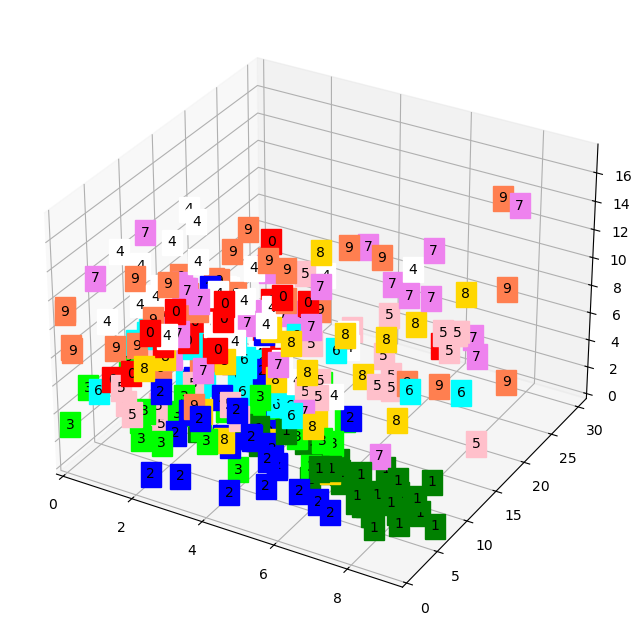

In [40]:
rcParams['figure.figsize'] = 10, 8
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

xs = encoded_imgs[:, 0]
ys = encoded_imgs[:, 1]
zs = encoded_imgs[:, 2]
color = ['red', 'green', 'blue','lime','white', 'pink', 'aqua', 'violet', 'gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(xs.min(), ys.max())
ax.set_zlim(xs.min(), zs.max())
plt.show()

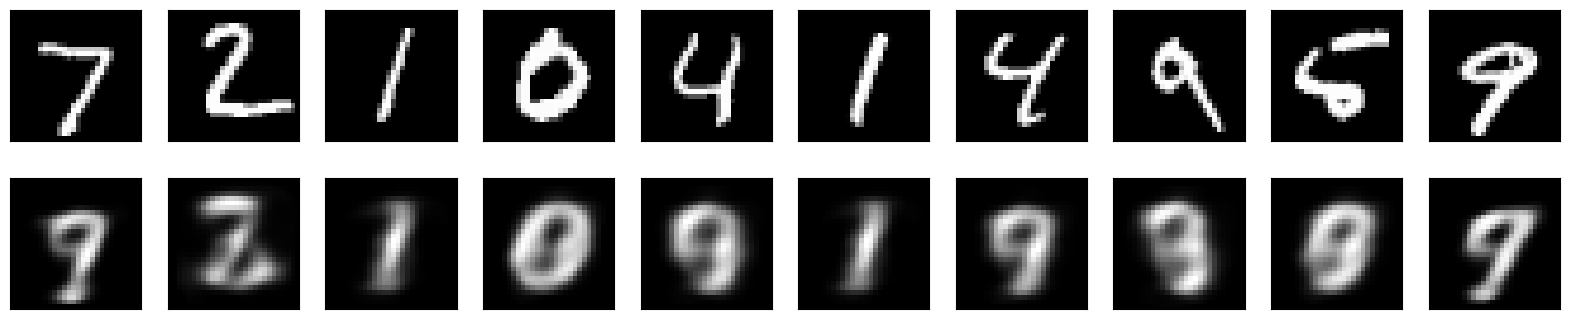

In [41]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [42]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [43]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results =[]
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(' '.join(tmp))
    return results

corpus = remove_stop_words(corpus)

In [44]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [45]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
words = set(words)
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [46]:
word2int = {}
for i, word in enumerate(words):
    word2int[word] = i
word2int

{'strong': 0,
 'pretty': 1,
 'queen': 2,
 'woman': 3,
 'prince': 4,
 'girl': 5,
 'young': 6,
 'boy': 7,
 'man': 8,
 'princess': 9,
 'wise': 10,
 'king': 11}

In [47]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

In [48]:
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [49]:
win_size = 2
data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx-win_size, 0): min(idx+win_size, len(sentence)-1) +1]:
            if neighbor != word:
                data.append([word, neighbor])

In [50]:
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [51]:
df = pd.DataFrame(data, columns = ['input', 'label'])
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [52]:
one_hot_dim = len(words)

In [53]:
one_hot_dim

12

In [54]:
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(one_hot_dim)
    one_hot_encoding[data_point_index]=1
    return one_hot_encoding

X = []
Y = []

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

X_train = np.asarray(X)
Y_train = np.asarray(Y)

encoding_dim = 2
input_word = Input(shape=(one_hot_dim))
encoded = Dense(encoding_dim, use_bias=False)(input_word)
decoded = Dense(one_hot_dim, activation='softmax')(encoded)
w2v_model = Model(input_word, decoded)
w2v_model.compile(optimizer = 'adam', loss='categorical_crossentropy')

In [55]:
w2v_model.fit(X_train, Y_train, epochs=1000, shuffle=True, verbose=0)

In [56]:
w2v_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 24        
                                                                 
 dense_5 (Dense)             (None, 12)                36        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
vectors = w2v_model.layers[1].weights[0].numpy().tolist()

In [58]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = list(words)
w2v_df

,x1,x2,word
0,-1.771075,-0.090414,strong
1,0.555128,1.911114,pretty
2,1.814285,0.823352,queen
3,0.892320,0.697244,woman
4,0.029812,-1.531009,prince
5,0.835623,1.006042,girl
6,-0.449165,0.410985,young
7,-0.874790,-0.391380,boy
8,0.472806,-1.388614,man
9,0.219672,1.122126,princess


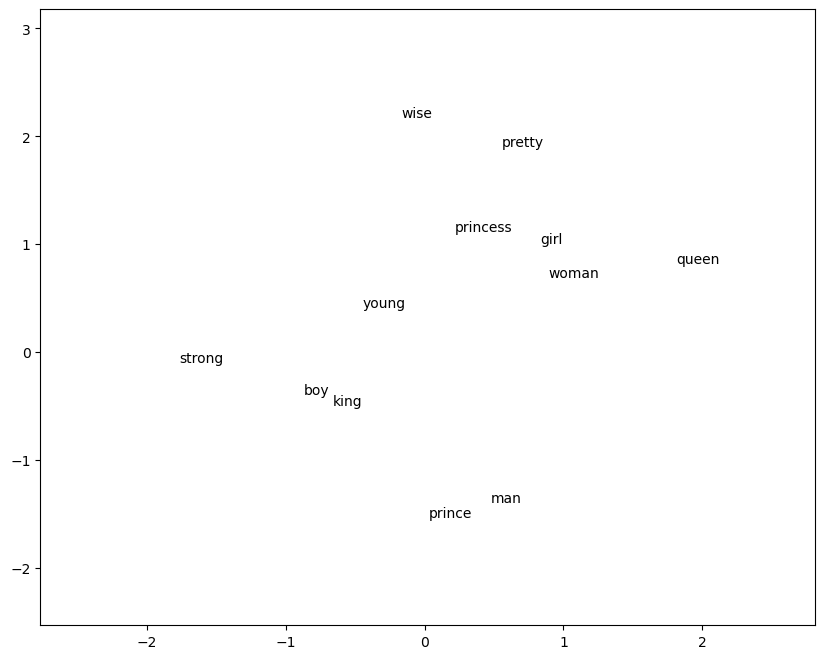

In [59]:
fig, ax = plt.subplots()
for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1, x2))
padding = 1.0
x_axis_min = np.amin(vectors, axis = 0)[0]-padding
y_axis_min = np.amin(vectors, axis = 0)[1]-padding
x_axis_max = np.amax(vectors, axis = 0)[0]+padding
y_axis_max = np.amax(vectors, axis = 0)[1]+padding
plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)

plt.show()

In [60]:
import gensim

In [61]:
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

In [62]:
model.most_similar(positive=['coffee'], topn=5)

[('coffees', 0.721267819404602),
 ('gourmet_coffee', 0.7057086825370789),
 ('Coffee', 0.6900455951690674),
 ('o_joe', 0.6891065835952759),
 ('Starbucks_coffee', 0.6874972581863403)]

In [63]:
# 왕-남자+여자 =여자
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.7118193507194519)]

In [64]:
from gensim.models.fasttext import FastText as FT_gensim

In [68]:
texts = [
    ['smart', 'student', 'college'],
    ['phone', 'call'],
    ['phone', 'talk', 'friend'],
    ['phone', 'chat', 'friend'],
    ['smart', 'girl', 'intelligent'],
    ['smart', 'idea']
]

In [71]:
model = FT_gensim(vector_size=2, window=2, min_count=1)
model.build_vocab(corpus_iterable= texts)
model.train(corpus_iterable= texts, total_examples=len(texts), epochs=100)

(171, 1600)

In [73]:
model.wv['smartphone']

array([-0.0412031 , -0.02069003], dtype=float32)

In [74]:
model.wv.most_similar(positive=['smartphone'], topn=3)

[('smart', 0.9863476157188416),
 ('chat', 0.6401960253715515),
 ('intelligent', 0.45944538712501526)]

In [75]:
model.wv.most_similar(positive=['friends'], topn=3)

[('talk', 0.9999616146087646),
 ('student', 0.9636636972427368),
 ('phone', 0.9458320736885071)]

In [76]:
model.wv.most_similar(positive=['girl'], topn=3)

[('call', 0.9201403856277466),
 ('idea', 0.8094455003738403),
 ('talk', 0.22262392938137054)]

In [77]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [78]:
tmp_file = get_tmpfile("test_word2vec.txt")

In [84]:
_ = glove2word2vec("glove.6B.300d.txt", tmp_file)

C:\Users\bbong\AppData\Local\Temp\ipykernel_13272\2822972168.py:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec("glove.6B.300d.txt", tmp_file)


In [85]:
model = KeyedVectors.load_word2vec_format(tmp_file)

In [83]:
model.most_similar(positive = ['coffee'], topn = 5)

[('drink', 0.818743884563446),
 ('drinks', 0.8176288604736328),
 ('wine', 0.814136266708374),
 ('tea', 0.8079647421836853),
 ('beer', 0.8042463660240173)]

In [86]:
import os
import sys

import numpy as np
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
import tensorflow as tf
tf.random.set_seed(1)
np.random.seed(1)

In [87]:
paragraph_dict_list = [
         {'paragraph': 'dishplace is located in sunnyvale downtown there is parking around the area but it can be difficult to find during peak business hours my sisters and i came to this place for dinner on a weekday they were really busy so i highly recommended making reservations unless you have the patience to wait', 'category': 'food'},
         {'paragraph': 'service can be slower during busy hours but our waiter was courteous and help gave some great entree recommendations', 'category': 'food'},
         {'paragraph': 'portions are huge both french toast and their various omelettes are really good their french toast is probably 1.5x more than other brunch places great place to visit if you are hungry and dont want to wait 1 hour for a table', 'category': 'food'},
         {'paragraph': 'we started with apps going the chicken and waffle slides and chicken nachos the sliders were amazing and the nachos were good too maybe by themselves the nachos would have scored better but after those sliders they were up against some tough competition', 'category': 'food'},
         {'paragraph': 'the biscuits and gravy was too salty two people in my group had the gravy and all thought it was too salty my hubby ordered a side of double egg and it was served on two small plates who serves eggs to one person on separate plates we commented on that when it was delivered and even the server laughed and said she doesnt know why the kitchen does that presentation of food is important and they really missed on this one', 'category': 'food'},
         {'paragraph': 'the garlic fries were a great starter (and a happy hour special) the pancakes looked and tasted great and were a fairly generous portion', 'category': 'food'},
         {'paragraph': 'our meal was excellent i had the pasta ai formaggi which was so rich i didnt dare eat it all although i certainly wanted to excellent flavors with a great texture contrast between the soft pasta and the crisp bread crumbs too much sauce for me but a wonderful dish', 'category': 'food'},
         {'paragraph': 'what i enjoy most about palo alto is so many restaurants have dog-friendly seating outside i had bookmarked italico from when they first opened about a 1.5 years ago and was jonesing for some pasta so time to finally knock that bookmark off', 'category': 'food'},
         {'paragraph': 'the drinks came out fairly quickly a good two to three minutes after the orders were taken i expected my iced tea to taste a bit more sweet but this was straight up green tea with ice in it not to complain of course but i was pleasantly surprised', 'category': 'food'},
         {'paragraph': 'despite the not so good burger the service was so slow the restaurant wasnt even half full and they took very long from the moment we got seated to the time we left it was almost 2 hours we thought that it would be quick since we ordered as soon as we sat down my coworkers did seem to enjoy their beef burgers for those who eat beef however i will not be returning it is too expensive and extremely slow service', 'category': 'food'},
    
         {'paragraph': 'the four reigning major champions simona halep caroline wozniacki angelique kerber and defending us open champion sloane stephens could make a case for being the quartet most likely to succeed especially as all but stephens has also enjoyed the no1 ranking within the last 14 months as they prepare for their gruelling new york campaigns they currently hold the top four places in the ranks', 'category': 'sports'},
         {'paragraph': 'the briton was seeded nn7 here last year before a slump in form and confidence took her down to no46 after five first-round losses but there have been signs of a turnaround including a victory over a sub-par serena williams in san jose plus wins against jelena ostapenko and victoria azarenka in montreal. konta pulled out of new haven this week with illness but will hope for good things where she first scored wins in a major before her big breakthroughs to the semis in australia and wimbledon', 'category': 'sports'},
         {'paragraph': 'stephens surged her way back from injury in stunning style to win her first major here last year—and ranked just no83 she has since proved what a big time player she is winning the miami title via four fellow major champions then reaching the final at the french open back on north american hard courts she ran to the final in montreal only just edged out by halep she has also avoided many of the big names in her quarter—except for wild card azarenka as a possible in the third round', 'category': 'sports'},
         {'paragraph': 'when it came to england chances in the world cup it would be fair to say that most fans had never been more pessimistic than they were this year after enduring years of truly dismal performances at major tournaments – culminating in the 2014 event where they failed to win any of their three group games and finished in bottom spot those results led to the resignation of manager roy hodgson', 'category': 'sports'},
         {'paragraph': 'the team that eliminated russia – croatia – also improved enormously during the tournament before it began their odds were 33/1 but they played with real flair and star players like luka modric ivan rakitic and ivan perisic showed their quality on the world stage having displayed their potential by winning all three of their group stage games croatia went on to face difficult tests like the semi-final against england', 'category': 'sports'},
         {'paragraph': 'the perseyside outfit finished in fourth place in the premier league table and without a trophy last term after having reached the champions league final before losing to real madrid', 'category': 'sports'},
         {'paragraph': 'liverpool fc will return to premier league action on saturday lunchtime when they travel to leicester city in the top flight as they look to make it four wins in a row in the league', 'category': 'sports'},
         {'paragraph': 'alisson signed for liverpool fc from as roma this summer and the brazilian goalkeeper has helped the reds to keep three clean sheets in their first three premier league games', 'category': 'sports'},
         {'paragraph': 'but the rankings during that run-in to new york hid some very different undercurrents for murray had struggled with a hip injury since the clay swing and had not played a match since losing his quarter-final at wimbledon and he would pull out of the us open just two days before the tournament began—too late however to promote nederer to the no2 seeding', 'category': 'sports'},
         {'paragraph': 'then came the oh-so-familiar djokovic-nadal no-quarter-given battle for dominance in the third set there were exhilarating rallies with both chasing to the net both retrieving what looked like winning shots nadal more than once pulled off a reverse smash and had his chance to seal the tie-break but it was djokovic serving at 10-9 who dragged one decisive error from nadal for a two-sets lead', 'category': 'sports'}
]
df = pd.DataFrame(paragraph_dict_list)
df = df[['paragraph', 'category']]

In [88]:
docs = df['paragraph'].tolist()
categories = df['category'].tolist()

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(docs)

In [90]:
t.word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'a': 4,
 'in': 5,
 'it': 6,
 'was': 7,
 'for': 8,
 'but': 9,
 'they': 10,
 'of': 11,
 'i': 12,
 'were': 13,
 'their': 14,
 'on': 15,
 'is': 16,
 'so': 17,
 'we': 18,
 'with': 19,
 'had': 20,
 'that': 21,
 'as': 22,
 'this': 23,
 'she': 24,
 'be': 25,
 'my': 26,
 'great': 27,
 'good': 28,
 'too': 29,
 'after': 30,
 'two': 31,
 'from': 32,
 'first': 33,
 'three': 34,
 'major': 35,
 'before': 36,
 'her': 37,
 'final': 38,
 'league': 39,
 'during': 40,
 'came': 41,
 'have': 42,
 'some': 43,
 '1': 44,
 'more': 45,
 'would': 46,
 'all': 47,
 'when': 48,
 'out': 49,
 'not': 50,
 'since': 51,
 'four': 52,
 'has': 53,
 'last': 54,
 'at': 55,
 'there': 56,
 'hours': 57,
 'place': 58,
 'really': 59,
 'service': 60,
 'are': 61,
 'both': 62,
 'french': 63,
 'than': 64,
 'nachos': 65,
 'by': 66,
 'those': 67,
 'against': 68,
 'group': 69,
 'who': 70,
 'one': 71,
 'pasta': 72,
 'what': 73,
 'most': 74,
 'time': 75,
 'will': 76,
 'champions': 77,
 'open': 78,
 'stephen

In [106]:
vocab_size = len(t.word_index) + 1

In [107]:
vocab_size

539

In [93]:
encoded_docs = t.texts_to_sequences(docs)

In [94]:
max_length = 91

In [95]:
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [96]:
padded_docs[0]

array([162,  16, 163,   5, 164, 165,  56,  16, 166, 167,   1, 168,   9,
         6,  91,  25,  92,   2, 169,  40, 170, 171,  57,  26, 172,   3,
        12,  41,   2,  23,  58,   8, 173,  15,   4, 174,  10,  13,  59,
        93,  17,  12, 175, 176, 177, 178, 179,  94,  42,   1, 180,   2,
        95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [97]:
labels = np.array([category_encode(category) for category in categories])

In [98]:
labels

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [99]:
embeddings_index = dict()

In [102]:
f = open('glove.6B.100d.txt', encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

In [109]:
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector      

In [110]:
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(padded_docs, np.array(labels), epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 0s 441ms/step - loss: 0.6876 - accuracy: 0.5500
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 0.4723 - accuracy: 0.6500
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 0.2035 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 0.1071 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 0.0733 - accuracy: 1.0000
